<a href="https://colab.research.google.com/github/Badar-Islam/Projects/blob/main/Netflix/Netflix_Data_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Business Problem**:
Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

Genre Horror -> 1000

Watched # users -> 10000 users watched these 1000 movies (interested)
9000/10000 they stopped movie midway

Genre = horror popular

Completion rate of horror = 50%

### What is expected?
Assuming you are a data analyst/ scientist at Netflix, you have been assigned the task of
analyzing the given dataset to extract valuable insights and provide actionable
recommendations

### Column Profiling:
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

### **Importing Libraries and Loading Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1nq4fF4OB3lAOMkkZlgnzQ6Q8s7idi7Qo" -O netflix.csv

#https://drive.google.com/file/d/1nq4fF4OB3lAOMkkZlgnzQ6Q8s7idi7Qo/view?usp=drive_link

--2024-03-28 15:14:54--  https://drive.google.com/uc?export=download&id=1nq4fF4OB3lAOMkkZlgnzQ6Q8s7idi7Qo
Resolving drive.google.com (drive.google.com)... 74.125.137.102, 74.125.137.113, 74.125.137.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nq4fF4OB3lAOMkkZlgnzQ6Q8s7idi7Qo&export=download [following]
--2024-03-28 15:14:54--  https://drive.usercontent.google.com/download?id=1nq4fF4OB3lAOMkkZlgnzQ6Q8s7idi7Qo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [application/octet-stream]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  19.5MB/s    i

In [ ]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Length of Data:**

In [ ]:
df.shape

(8807, 12)

So we are having a total of 8800 rows with 12 columns

In [ ]:
df.info() # To check data type and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Number of unique values for each column:**

In [ ]:
for col in df.columns:
  print(f"{col} : {df[col].nunique()}")

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


**Checking for null values present in the each column:**

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Checking occurance of ratings:**

In [ ]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Above we could see 3 entries which does not make any sense! that is ratings having duration.

We can see there are list of values in columns like `director` and `cast` which needs to be seperated/unnested

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


**Unnesting list of values:**

In [ ]:
# unnesting director column for each director
constraint_dir = df['director'].apply(lambda x: str(x).split(',')).tolist()
df_dir = pd.DataFrame(constraint_dir, index= df['title'])
df_dir = df_dir.stack().reset_index()
df_dir.rename(columns={0:'director'}, inplace=True)
df_dir.drop(['level_1'], inplace=True, axis=1)
df_dir.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
# unnesting cast column for each cast
constraint_cast = df['cast'].apply(lambda x: str(x).split(',')).tolist()
df_cast = pd.DataFrame(constraint_cast, index=df['title'])
df_cast = df_cast.stack().reset_index()
df_cast.rename(columns={0:'cast'}, inplace=True)
df_cast.drop(['level_1'], axis=1, inplace=True)
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
# unnesting listed_in column for each Genre in a movie
constraint_genre = df['listed_in'].apply(lambda x: str(x).split(',')).tolist()
df_genre = pd.DataFrame(constraint_genre, index=df['title'])
df_genre = df_genre.stack().reset_index()
df_genre.rename(columns={0:'genre'}, inplace=True)
df_genre.drop(['level_1'], axis=1, inplace=True)
df_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
# unnesting country column for each country
constraint_con = df['country'].apply(lambda x: str(x).split(',')).tolist()
df_con = pd.DataFrame(constraint_con, index=df['title'])
df_con = df_con.stack().reset_index()
df_con.rename(columns={0:'country'}, inplace=True)
df_con.drop(['level_1'], axis=1, inplace=True)
df_con.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


**Merging columns:**

In [ ]:
df_sep = df_dir.merge(df_cast, on=['title'], how='left')
df_sep = df_sep.merge(df_genre, on=['title'], how='left')
df_sep = df_sep.merge(df_con, on=['title'], how='left')
df_sep

,title,director,cast,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
202061,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [ ]:
df_final = df_sep.merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']],
                        on=['title'], how='left')
df_final.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final.shape

(202065, 11)

**Checking for nulls again:**

In [ ]:
df_final.replace('nan', np.nan, inplace=True)
df_final.isnull().sum()

title               0
director        50643
cast             2149
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

**Handling Nulls:**

Checking for column **duration** :

In [ ]:
df_final[df_final['duration'].isnull()]

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN



In duration column, We observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls should be replaced by corresponding values in ratings column, also mark those `rating` columns as `NR` --> `Not Rated`:

In [ ]:
df_final.loc[df_final['duration'].isnull(), 'duration'] = df_final.loc[df_final['duration'].isnull(), 'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False), 'rating'] = 'NR'
df_final.isnull().sum()

title               0
director        50643
cast             2149
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

For column **rating**:

Placing setting all missing values as **NR - Not Rated**

In [ ]:
df_final.loc[df_final['rating'].isnull()] = df_final.loc[df_final['rating'].isnull()].fillna('NR')


In [ ]:
df_final.isnull().sum()

title               0
director        50583
cast             2149
genre               0
country         11895
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

For column **date_added**:

In [ ]:
df_final.loc[df_final['date_added'].isnull()].head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
136940,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136941,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136942,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136943,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136944,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


date_added column is related to column year_release. So, if we need to deal with nulls in column date_added, we can take the mode of date_added based on year_release and replace the nulls with such corresponding values.

In [ ]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  date = df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i, 'date_added'] = df_final.loc[df_final['release_year']==i, 'date_added'].fillna(date)

In [ ]:
df_final.isnull().sum()

title               0
director        50583
cast             2149
genre               0
country         11895
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

For column **director** and **cast**:

We could probably use cast, genre, country in order to impute the columns like director and cast but it would be interesting to look on certain directors and actors work, so we will be replacing with `Unknown` rather than imputing it with mode of values:

In [ ]:
df_final['director'].fillna('Unknown Director', inplace=True)
df_final['cast'].fillna('Unknown Actor', inplace=True)

For **Country**:

In [ ]:
null_director = df_final.loc[df_final['country'].isnull(), 'director'].unique() # director where country is null
not_null_country = df_final.dropna(subset=['country']) # dataframe where cast is not null
mode_country = not_null_country.groupby('director')['country'].apply(lambda x: x.mode().iloc[0])
df_final['country'] = df_final.apply(lambda row : mode_country.get(row['director'], row['country']) , axis=1 )
df_final['country'].fillna('Unknown Country', inplace=True)

In [ ]:
df_final.isnull().sum()

title           0
director        0
cast            0
genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

So null values has been taken care of, now let's see what else can be done

In [ ]:
df_final.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


we can see duration having 2 different units, mins for movies and seasons for tv shows. Let's look into it

In [ ]:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

We can try to create a new column which only contains integer values for the movies duration, and nothing for tv show. It can be helpful while performing analysis.

In [ ]:
df_final['duration'] = df_final['duration'].str.replace('min', '')
df_final.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration'].unique()

array(['90 ', '2 Seasons', '1 Season', '91 ', '125 ', '9 Seasons', '104 ',
       '127 ', '4 Seasons', '67 ', '94 ', '5 Seasons', '161 ', '61 ',
       '166 ', '147 ', '103 ', '97 ', '106 ', '111 ', '3 Seasons', '110 ',
       '105 ', '96 ', '124 ', '116 ', '98 ', '23 ', '115 ', '122 ', '99 ',
       '88 ', '100 ', '6 Seasons', '102 ', '93 ', '95 ', '85 ', '83 ',
       '113 ', '13 ', '182 ', '48 ', '145 ', '87 ', '92 ', '80 ', '117 ',
       '128 ', '119 ', '143 ', '114 ', '118 ', '108 ', '63 ', '121 ',
       '142 ', '154 ', '120 ', '82 ', '109 ', '101 ', '86 ', '229 ',
       '76 ', '89 ', '156 ', '112 ', '107 ', '129 ', '135 ', '136 ',
       '165 ', '150 ', '133 ', '70 ', '84 ', '140 ', '78 ', '7 Seasons',
       '64 ', '59 ', '139 ', '69 ', '148 ', '189 ', '141 ', '130 ',
       '138 ', '81 ', '132 ', '10 Seasons', '123 ', '65 ', '68 ', '66 ',
       '62 ', '74 ', '131 ', '39 ', '46 ', '38 ', '8 Seasons',
       '17 Seasons', '126 ', '155 ', '159 ', '137 ', '12 ', '273 ', '36 ',


In [ ]:
df_final['duration_copy'] = df_final['duration'].copy()
df_final1 = df_final.copy()

In [ ]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'), 'duration_copy'] = 0
df_final1['duration_copy'] = df_final1['duration_copy'].astype('int')
df_final1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [ ]:
df_final1['duration_copy'].describe()

count    202065.000000
mean         77.152065
std          52.262613
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

From above, we can observe that on an average length of a movies is around 70-80 mins, whereas highest number of movies produced (75%tile) are of length around 110-120 mins, let's try to visualize

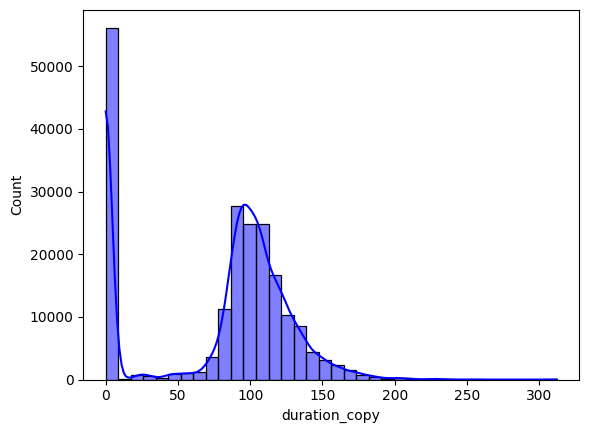

In [ ]:
sns.histplot(data=df_final1['duration_copy'], kde=True,
             bins=int(36), color='blue'
             )
plt.show()

Let's create bins to categorize the movies in better way

In [ ]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [ ]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final1['duration'].value_counts()

80-100        52992
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7701
150-200        6737
3 Seasons      5084
1-50           2548
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [ ]:
df_final1['date_added'] = pd.to_datetime(df_final1['date_added'])
df_final1['month_added'] = df_final1['date_added'].dt.month
df_final1['week_added'] = df_final1['date_added'].dt.isocalendar().week
df_final1['year_added'] = df_final1['date_added'].dt.year
df_final1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,month_added,week_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021


Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it's only one movie in different languages, presence of brackets and content between brackets is removed.

In [ ]:
df_final1['title'] = df_final1['title'].str.replace(r"\(.*\)", '', regex=True)
df_final1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,month_added,week_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021


Striping whitespaces from all columns if there are any:

In [ ]:
df_final1['genre'] = df_final1['genre'].str.strip()
df_final1['title'] = df_final1['title'].str.strip()
df_final1['cast'] = df_final1['cast'].str.strip()
df_final1['country'] = df_final1['country'].str.strip()

**Univariate Analysis:**

Number of various distinct `titles` based on `genre` :

In [ ]:
df_final1.groupby(['genre']).agg({'title':'nunique'})

,title
genre,
Action & Adventure,852
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,638
Classic & Cult TV,28
Classic Movies,116
Comedies,1670
Crime TV Shows,470


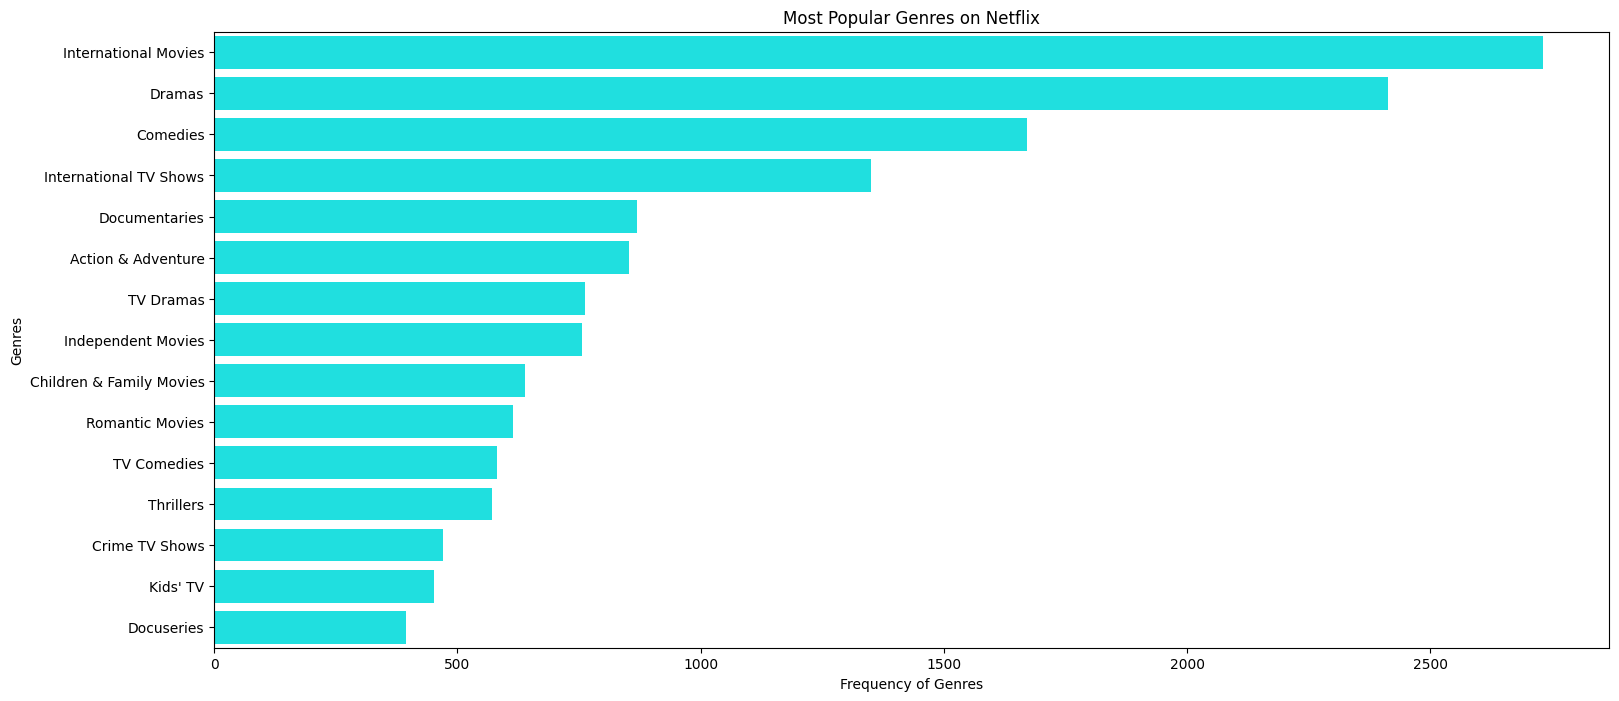

In [ ]:
df_genre = df_final1.groupby(['genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:15]
plt.figure(figsize=(18,8))
sns.barplot(data= df_genre, x=df_genre['title'], y=df_genre['genre'], color='#00ffff')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.title("Most Popular Genres on Netflix")
plt.show()

From above, we can observe that the categories like `International Movies`, `Dramas` and `Comedies` are the most popular genre on the platform.

`titles` based on `type`

In [ ]:
df_final1.groupby(['type']).agg({'title':'nunique'})

,title
type,
Movie,6106
TV Show,2675


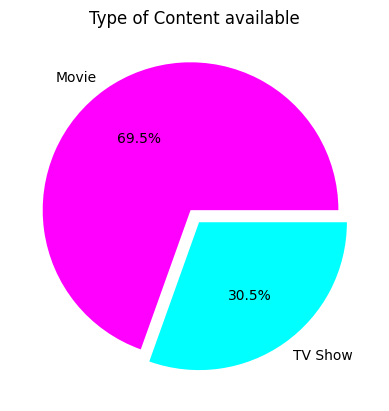

In [ ]:
 df_type = df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
 plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['#ff00ff','#00ffff'],autopct='%.1f%%')
 plt.title("Type of Content available")
 plt.show()

We have 7:3 ratio of Movies and TV Shows in our data

`titles` based on `country`:

In [ ]:
df_final1.groupby('country').agg({'title':'nunique'})

,title
country,
,5
Afghanistan,1
Albania,1
Algeria,1
Angola,1
...,...
Uruguay,6
Venezuela,1
Vietnam,7


The above dataframe shows a flaw in which we are seeing countries, such as Cambodia and Cambodia, or United States and United States, are shown as different countries.They should have been same.


In [ ]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
print(np.sort(df_final1['country'].unique()))

['' 'Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Bangladesh' 'Belgium' 'Bermuda' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Croatia' 'Czech Republic'
 'Denmark' 'Dominican Republic' 'East Germany' 'Egypt' 'Finland' 'France'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Lebanon' 'Luxembourg'
 'Malawi' 'Malaysia' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Nigeria' 'Norway' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Senegal' 'Serbia' 'Singapore'
 'Slovakia' 'Slovenia' 'South Africa' 'South Korea' 'Soviet Union' 'Spain'
 'Sri Lanka' 'Sweden' 'Switzerland' 'Taiwan' 'Thailand' 'Turkey' 'Ukraine'
 'U

In [ ]:
df_final1.groupby('country').agg({'title':'nunique'})

,title
country,
,5
Afghanistan,1
Albania,1
Algeria,1
Angola,1
...,...
Uruguay,6
Venezuela,1
Vietnam,7


Now it's look better

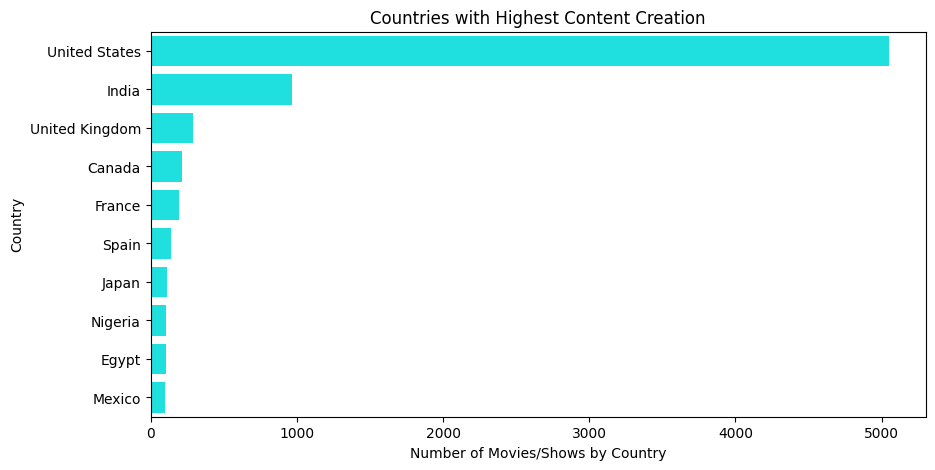

In [ ]:
df_country = df_final1.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:11]
df_country = df_country[df_country['country'] != 'Unknown Country']
plt.figure(figsize=(10,5))
sns.barplot(data= df_country, x=df_country['title'], y=df_country['country'], color='#00ffff')
plt.xlabel('Number of Movies/Shows by Country')
plt.ylabel('Country')
plt.title("Countries with Highest Content Creation")
plt.show()

So, USA, India, UK, Canada and France are leading country in content creation on netflix

`titles` based on `rating`:

In [ ]:
df_final1.groupby('rating').agg({'title':'nunique'})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,489
R,799
TV-14,2144
TV-G,220
TV-MA,3202


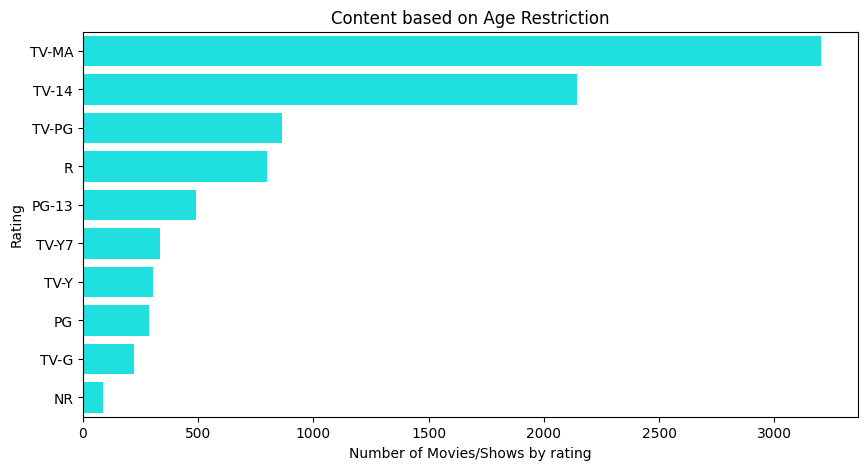

In [ ]:
df_rating = df_final1.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(data= df_rating, x=df_rating['title'], y=df_rating['rating'], color='#00ffff')
plt.xlabel('Number of Movies/Shows by rating')
plt.ylabel('Rating')
plt.title("Content based on Age Restriction")
plt.show()

Most of the content on Netflix is intended for Mature Audiences i.e TV-MA, TV-14 and R Rated. content not intended for audience under 14 and those which require Parental Guidance.

`titles` based on `duration`:

In [ ]:
df_final1.groupby(['duration']).agg({'title':'nunique'})

,title
duration,
1 Season,1792
1-50,287
10 Seasons,7
100-120,1669
11 Seasons,2
12 Seasons,2
120-150,887
13 Seasons,3
15 Seasons,2


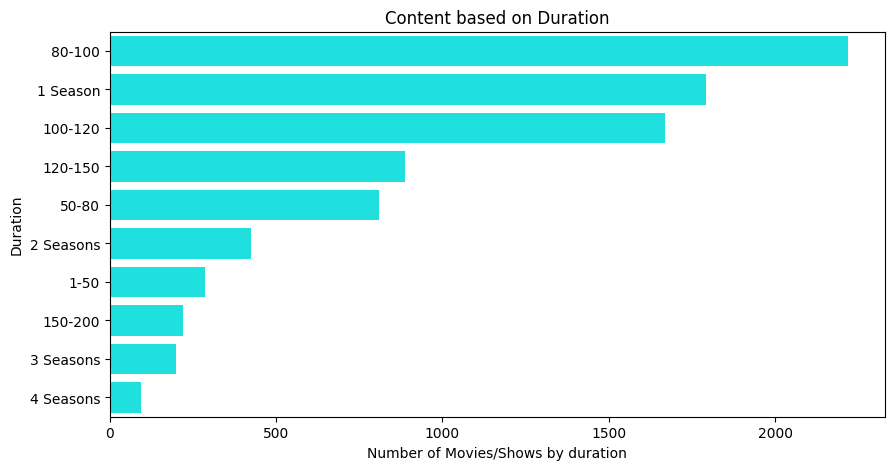

In [ ]:
df_duration = df_final1.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(data= df_duration, x=df_duration['title'], y=df_duration['duration'], color='#00ffff')
plt.xlabel('Number of Movies/Shows by duration')
plt.ylabel('Duration')
plt.title("Content based on Duration")
plt.show()

The duration of Most available content in our whole data is movies with duration of 80-100 mins and 100-120 mins.Along with Season 1 in tv show category. which basically mean most the tv shows don't get there sequel seasons.

`titles` based on `Actors`:

In [ ]:
df_final1.groupby(['cast']).agg({'title':'nunique'})

,title
cast,
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1
4Minute,1
...,...
Şevket Çoruh,1
Şinasi Yurtsever,3
Şükran Ovalı,1


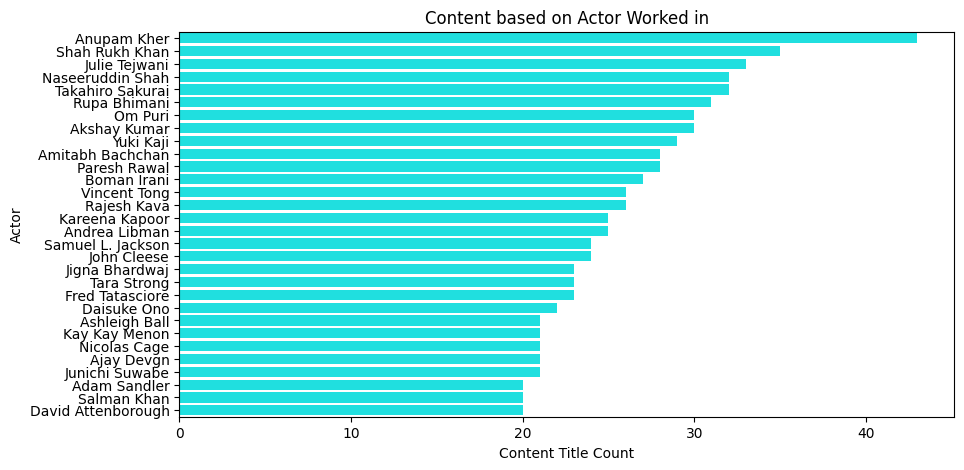

In [ ]:
df_cast = df_final1.groupby(['cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:31]
df_cast = df_cast[df_cast['cast']!='Unknown Actor']
plt.figure(figsize=(10,5))
sns.barplot(data= df_cast, x=df_cast['title'], y=df_cast['cast'], color='#00ffff')
plt.xlabel('Content Title Count')
plt.ylabel('Actor')
plt.title("Content based on Actor Worked in")
plt.show()

`titles` based on `directors`:

In [ ]:
df_final1.groupby(['director']).agg({"title":"nunique"})

,title
director,
Aaron Moorhead,2
Aaron Woolf,1
Abbas Alibhai Burmawalla,1
Abdullah Al Noor,1
Abhinav Shiv Tiwari,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


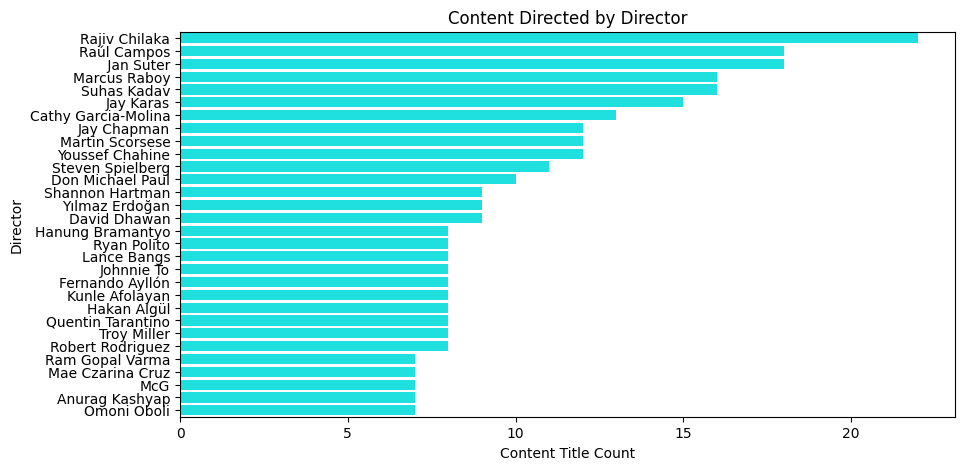

In [ ]:
df_director = df_final1.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:31]
df_director = df_director[df_director['director']!='Unknown Director']
plt.figure(figsize=(10,5))
sns.barplot(data= df_director, x=df_director['title'], y=df_director['director'], color='#00ffff')
plt.xlabel('Content Title Count')
plt.ylabel('Director')
plt.title("Content Directed by Director")
plt.show()

`title` based on `year`:

In [ ]:
df_final1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,month_added,week_added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021


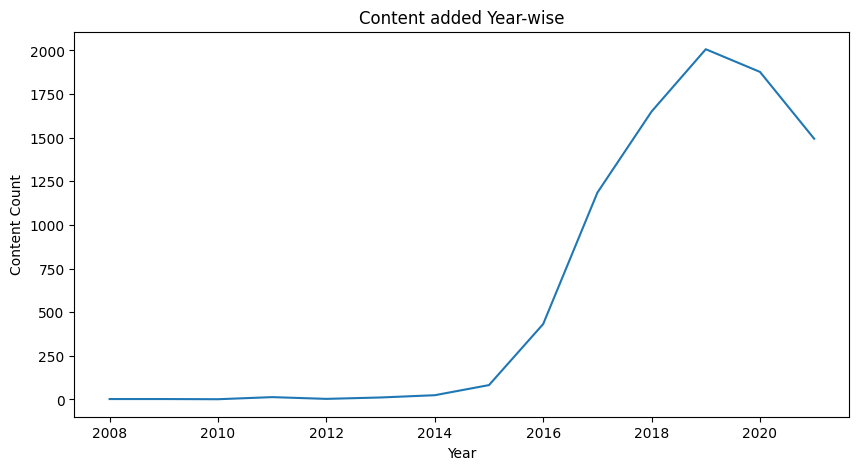

In [ ]:
df_year = df_final1.groupby(['year_added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel('Content Count')
plt.xlabel('Year')
plt.title("Content added Year-wise")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

`Movies` based on `Week`:

In [ ]:
df_final1.groupby(['week_added']).agg({'title':'nunique'})

,title
week_added,
1,372
2,107
3,113
4,88
5,208
6,97
7,147
8,110
9,254


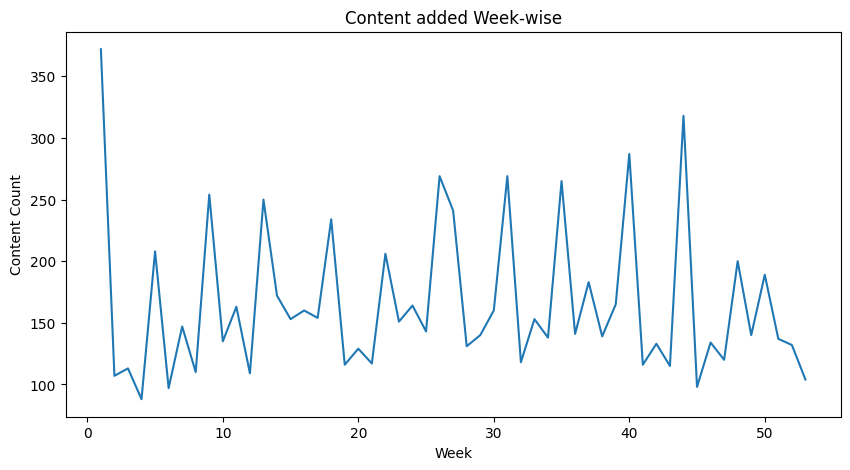

In [ ]:
df_week = df_final1.groupby(['week_added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_week, x='week_added', y='title')
plt.ylabel('Content Count')
plt.xlabel('Week')
plt.title("Content added Week-wise")
plt.show()

Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern.

`Movies`  added based on `Month`:

In [ ]:
df_final1.groupby(['month_added']).agg({'title':'nunique'})

,title
month_added,
1,737
2,563
3,742
4,764
5,630
6,725
7,832
8,747
9,769


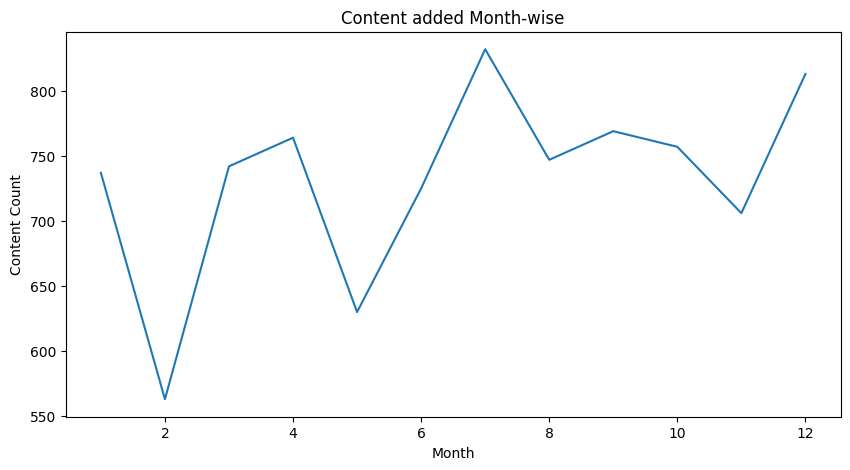

In [ ]:
df_month = df_final1.groupby(['month_added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel('Content Count')
plt.xlabel('Month')
plt.title("Content added Month-wise")
plt.show()


Most of the content is added in the first and last months across Netflix(similar observations as we had in last plot)

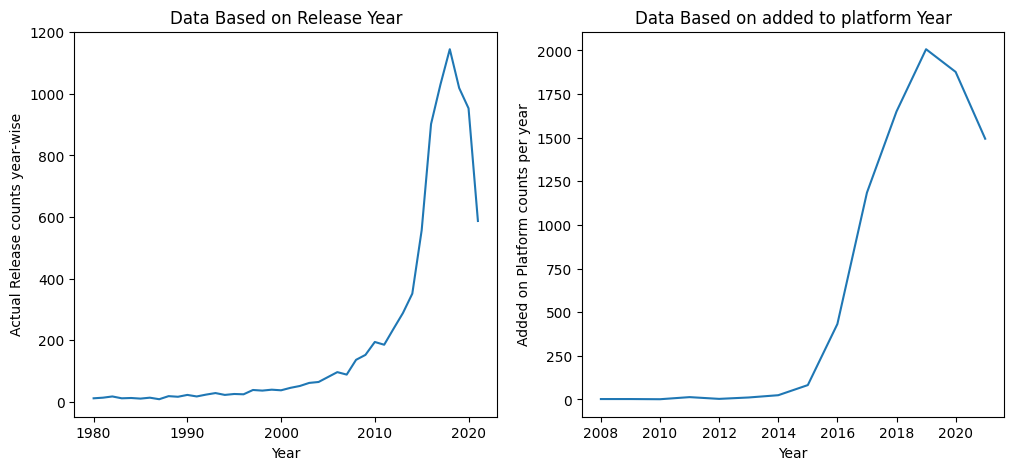

In [ ]:
df_release_year=df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Actual Release counts year-wise")
plt.xlabel("Year")
plt.title("Data Based on Release Year")

plt.subplot(1,2,2)
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel('Added on Platform counts per year')
plt.xlabel('Year')
plt.title("Data Based on added to platform Year")
plt.show()

After year 2016, we can see expansion of Netflix as a platform as they started to add content exponentionally. with highest content added in 2019, and the looks as per release date, they started added new content as soon as possible by 2016.

#### **Univariate Analysis separately for shows and movies**

In [ ]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

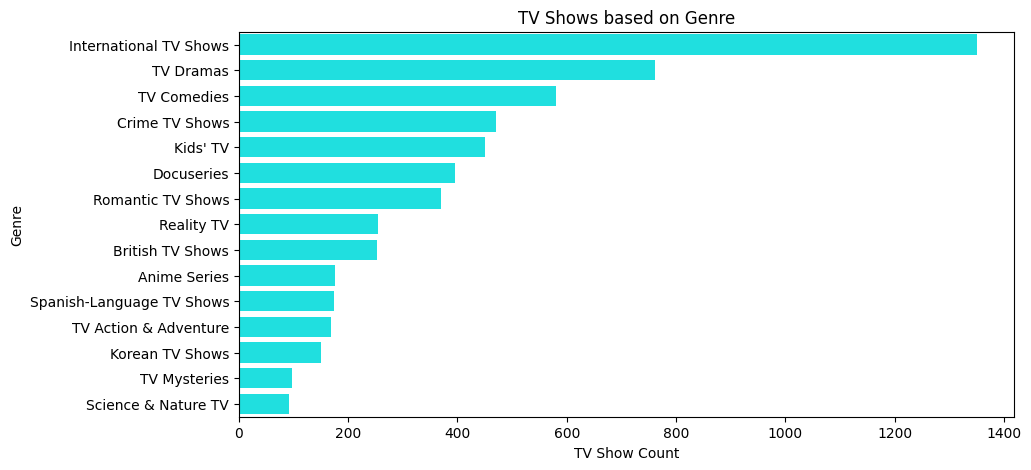

In [ ]:
df_genre = df_shows.groupby(['genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:15]
plt.figure(figsize=(10,5))
sns.barplot(data= df_genre, x=df_genre['title'], y=df_genre['genre'], color='#00ffff')
plt.xlabel('TV Show Count')
plt.ylabel('Genre')
plt.title("TV Shows based on Genre")
plt.show()

International TV Shows, Dramas and Comedy Genres are popular across TV Shows on Netflix

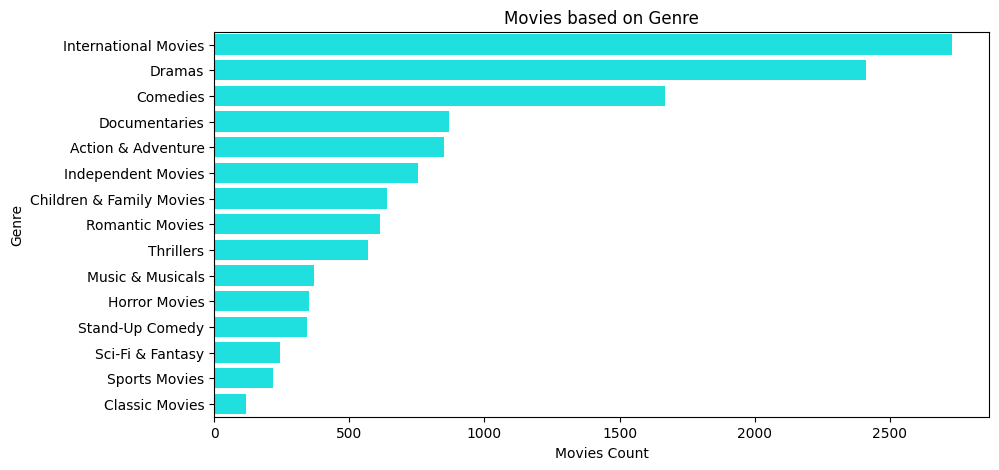

In [ ]:
df_genre = df_movies.groupby(['genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:15]
plt.figure(figsize=(10,5))
sns.barplot(data= df_genre, x=df_genre['title'], y=df_genre['genre'], color='#00ffff')
plt.xlabel('Movies Count')
plt.ylabel('Genre')
plt.title("Movies based on Genre")
plt.show()

International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix

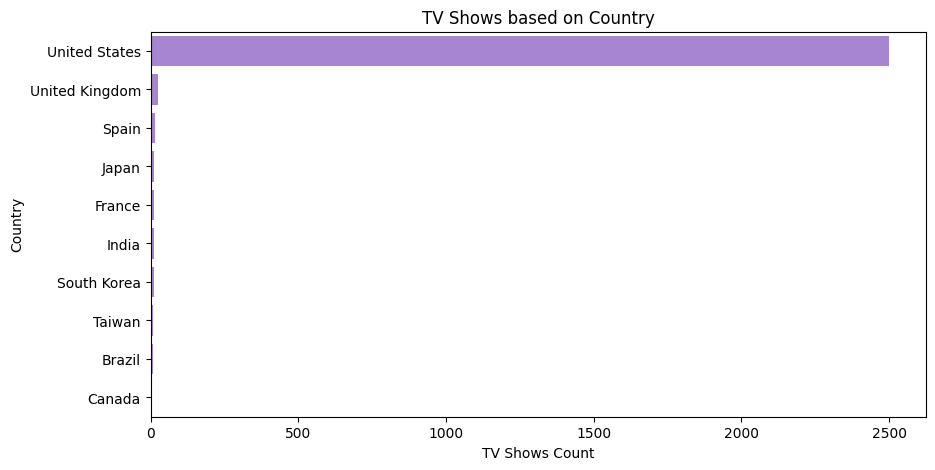

In [ ]:
df_country = df_shows.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:11]
df_country = df_country[df_country['country'] != 'Unknown Country']
plt.figure(figsize=(10,5))
sns.barplot(data= df_country, x=df_country['title'], y=df_country['country'], color='#a678de')
plt.xlabel('TV Shows Count')
plt.ylabel('Country')
plt.title("TV Shows based on Country")
plt.show()

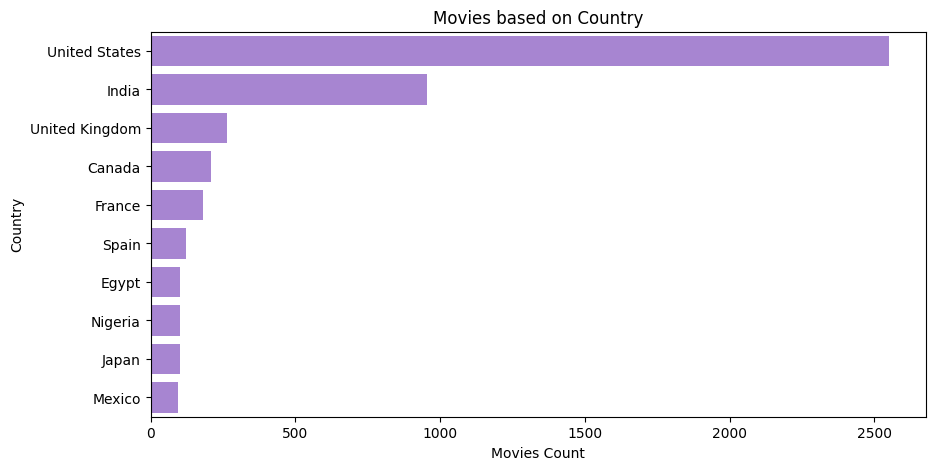

In [ ]:
df_country = df_movies.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:11]
df_country = df_country[df_country['country'] != 'Unknown Country']
plt.figure(figsize=(10,5))
sns.barplot(data= df_country, x=df_country['title'], y=df_country['country'], color='#a678de')
plt.xlabel('Movies Count')
plt.ylabel('Country')
plt.title("Movies based on Country")
plt.show()

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

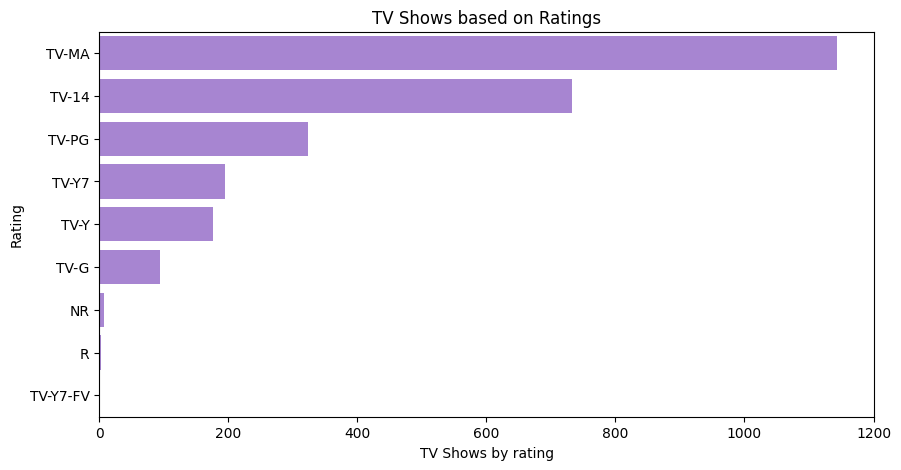

In [ ]:
df_rating = df_shows.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(data= df_rating, x=df_rating['title'], y=df_rating['rating'], color='#a678de')
plt.xlabel('TV Shows by rating')
plt.ylabel('Rating')
plt.title("TV Shows based on Ratings")
plt.show()

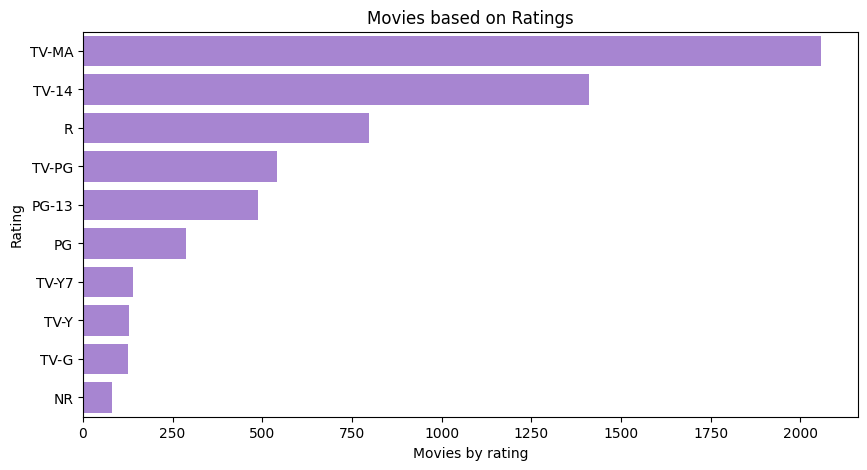

In [ ]:
df_rating = df_movies.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(data= df_rating, x=df_rating['title'], y=df_rating['rating'], color='#a678de')
plt.xlabel('Movies by rating')
plt.ylabel('Rating')
plt.title("Movies based on Ratings")
plt.show()

So from above observations we can conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.

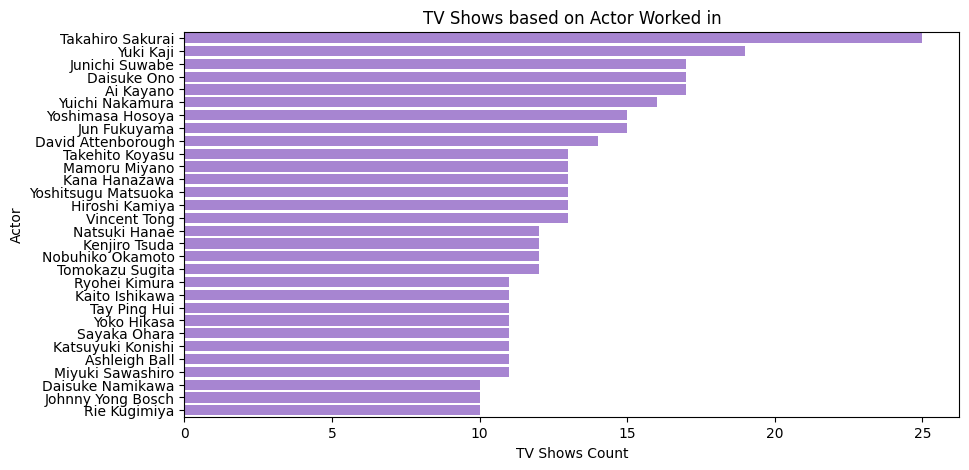

In [ ]:
df_cast = df_shows.groupby(['cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:31]
df_cast = df_cast[df_cast['cast']!='Unknown Actor']
plt.figure(figsize=(10,5))
sns.barplot(data= df_cast, x=df_cast['title'], y=df_cast['cast'], color='#a678de')
plt.xlabel('TV Shows Count')
plt.ylabel('Actor')
plt.title("TV Shows based on Actor Worked in")
plt.show()

Takahiro Sakurai, Yuki Kaji, Junichi Suwabe and other South Korean/Japanese actors are the most popular casts for the TV shows

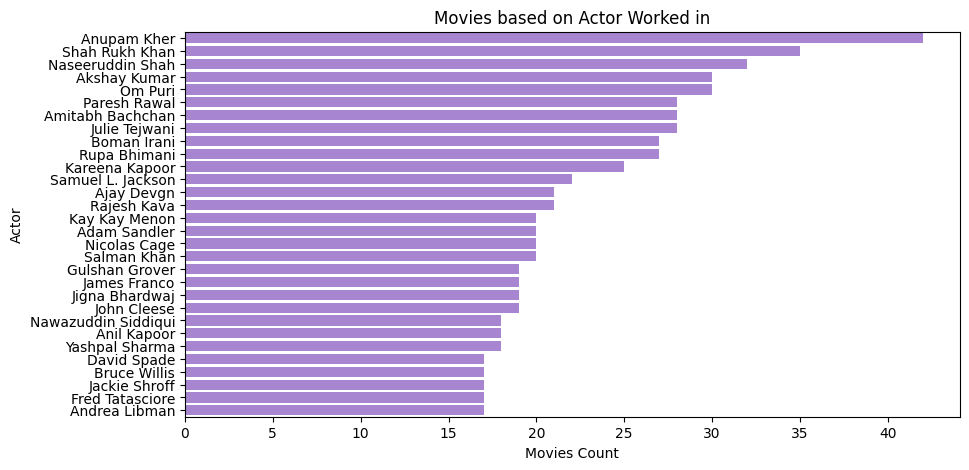

In [ ]:
df_cast = df_movies.groupby(['cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:31]
df_cast = df_cast[df_cast['cast']!='Unknown Actor']
plt.figure(figsize=(10,5))
sns.barplot(data= df_cast, x=df_cast['title'], y=df_cast['cast'], color='#a678de')
plt.xlabel('Movies Count')
plt.ylabel('Actor')
plt.title("Movies based on Actor Worked in")
plt.show()

bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular across movies on Netflix

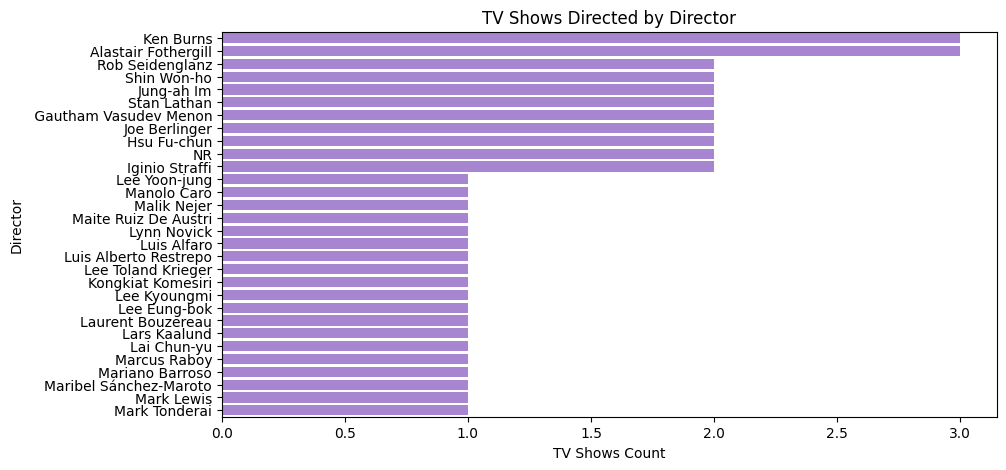

In [ ]:
df_director = df_shows.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:31]
df_director = df_director[df_director['director']!='Unknown Director']
plt.figure(figsize=(10,5))
sns.barplot(data= df_director, x=df_director['title'], y=df_director['director'], color='#a678de')
plt.xlabel('TV Shows Count')
plt.ylabel('Director')
plt.title("TV Shows Directed by Director")
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

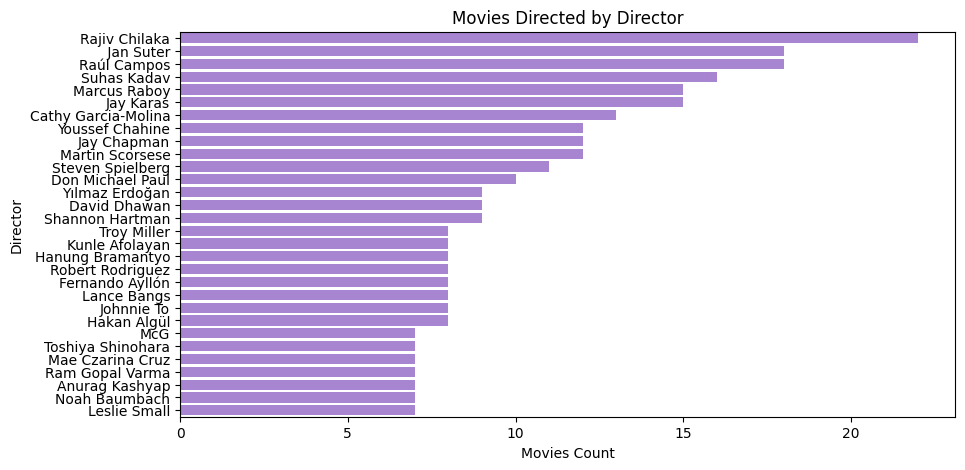

In [ ]:
df_director = df_movies.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[:31]
df_director = df_director[df_director['director']!='Unknown Director']
plt.figure(figsize=(10,5))
sns.barplot(data= df_director, x=df_director['title'], y=df_director['director'], color='#a678de')
plt.xlabel('Movies Count')
plt.ylabel('Director')
plt.title("Movies Directed by Director")
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

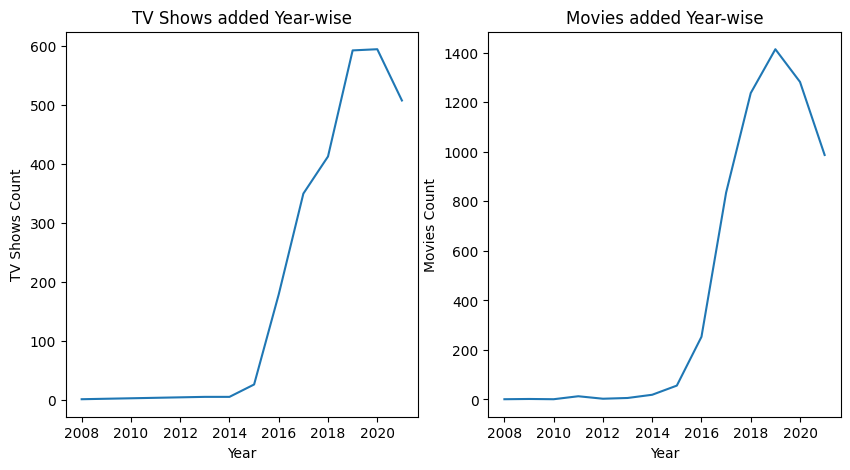

In [ ]:
df_year = df_shows.groupby(['year_added']).agg({'title':'nunique'}).reset_index()
df_year1 = df_movies.groupby(['year_added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel('TV Shows Count')
plt.xlabel('Year')
plt.title("TV Shows added Year-wise")

plt.subplot(1,2,2)
sns.lineplot(data=df_year1, x='year_added', y='title')
plt.ylabel('Movies Count')
plt.xlabel('Year')
plt.title("Movies added Year-wise")
plt.show()


Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

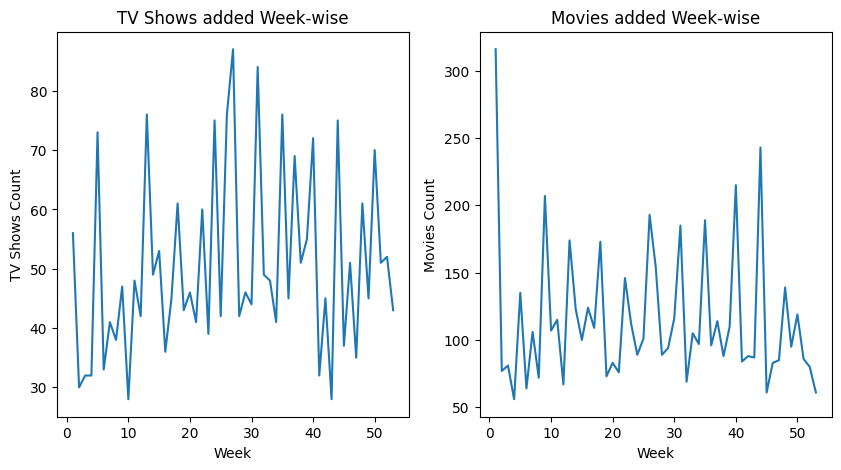

In [ ]:
df_week = df_shows.groupby(['week_added']).agg({'title':'nunique'}).reset_index()
df_week1 = df_movies.groupby(['week_added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_week, x='week_added', y='title')
plt.ylabel('TV Shows Count')
plt.xlabel('Week')
plt.title("TV Shows added Week-wise")

plt.subplot(1,2,2)
sns.lineplot(data=df_week1, x='week_added', y='title')
plt.ylabel('Movies Count')
plt.xlabel('Week')
plt.title("Movies added Week-wise")
plt.show()


TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July

Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

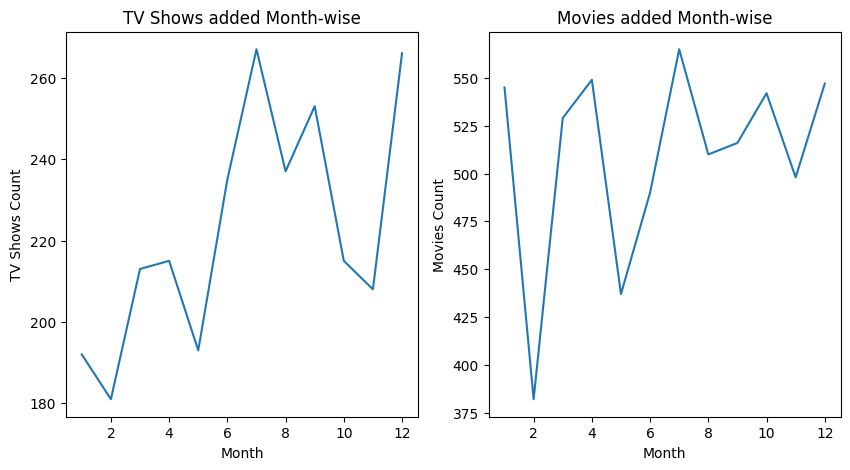

In [ ]:
df_month = df_shows.groupby(['month_added']).agg({'title':'nunique'}).reset_index()
df_month1 = df_movies.groupby(['month_added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel('TV Shows Count')
plt.xlabel('Month')
plt.title("TV Shows added Month-wise")

plt.subplot(1,2,2)
sns.lineplot(data=df_month1, x='month_added', y='title')
plt.ylabel('Movies Count')
plt.xlabel('Month')
plt.title("Movies added Month-wise")
plt.show()


This visulization, solidifies our previous observations that shows are mostly added in mid and end of year whereas movies in start, mid and end of year.

In [ ]:
top10_con = df_shows['country'].value_counts().index[:11]
top10_gen = df_shows['genre'].value_counts().index[:10]
top5_rat = df_shows['rating'].value_counts().index[:5]
top10_data = df_shows.loc[(df_shows['country'].isin(top10_con)) & (df_shows['genre'].isin(top10_gen)) & (df_shows['rating'].isin(top5_rat))]
top10_data

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,month_added,week_added,year_added
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
5,Blood & Water,Unknown Director,Khosi Ngema,TV Dramas,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
7,Blood & Water,Unknown Director,Gail Mabalane,International TV Shows,United States,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201937,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,International TV Shows,United States,s8801,TV Show,2016-12-15,2012,TV-PG,1 Season,12,50,2016
201938,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,Romantic TV Shows,United States,s8801,TV Show,2016-12-15,2012,TV-PG,1 Season,12,50,2016
201939,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,TV Dramas,United States,s8801,TV Show,2016-12-15,2012,TV-PG,1 Season,12,50,2016
202006,Zombie Dumb,Unknown Director,Unknown Actor,Kids' TV,United States,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons,7,27,2019


Removing United States in order to visualize the better picture for other countries as it's hard to see what's going to in other nations in presence of US.

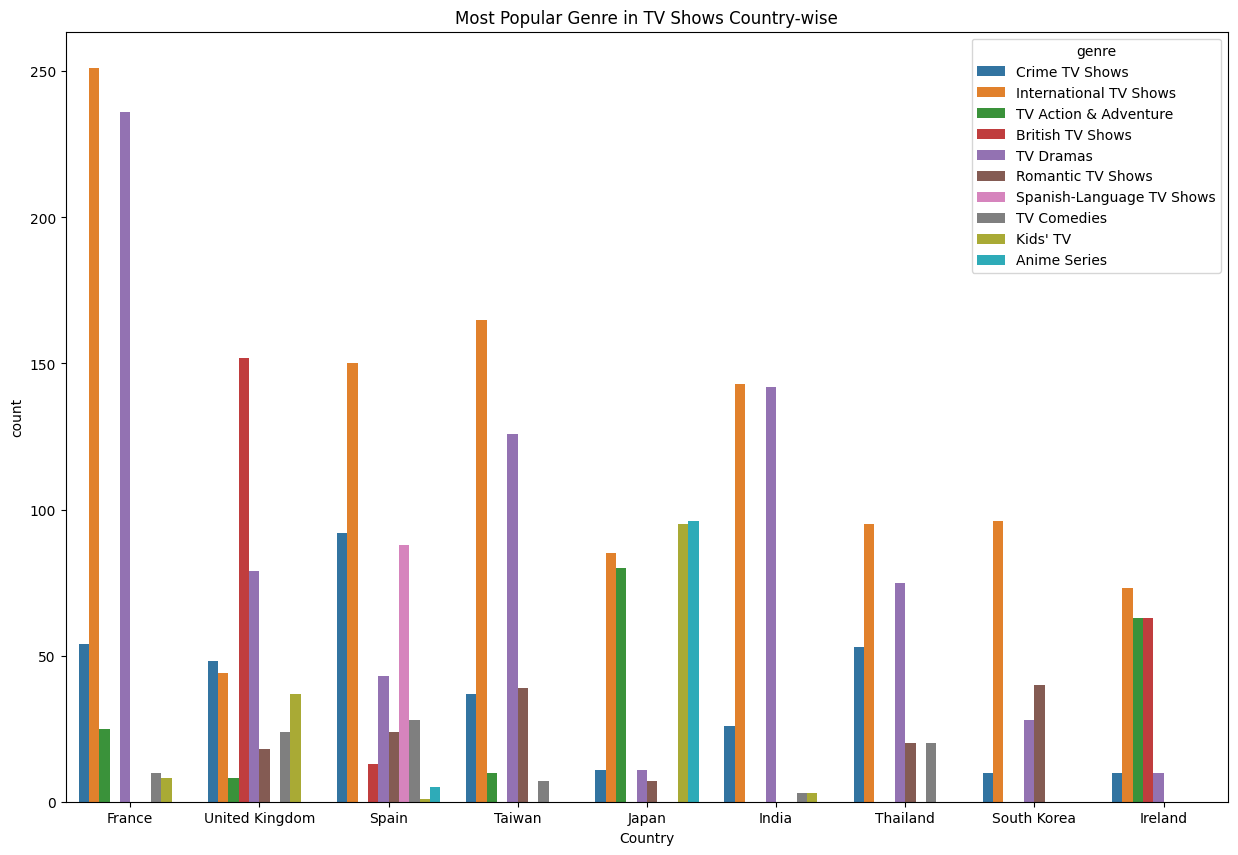

In [ ]:
top10_data1 = top10_data[(top10_data['country'] != 'Unknown Country') & (top10_data['country'] != 'United States')] #
plt.figure(figsize=(15,10))
sns.countplot(data= top10_data1, x='country', hue='genre')
plt.xlabel("Country")
plt.title("Most Popular Genre in TV Shows Country-wise")
plt.show()

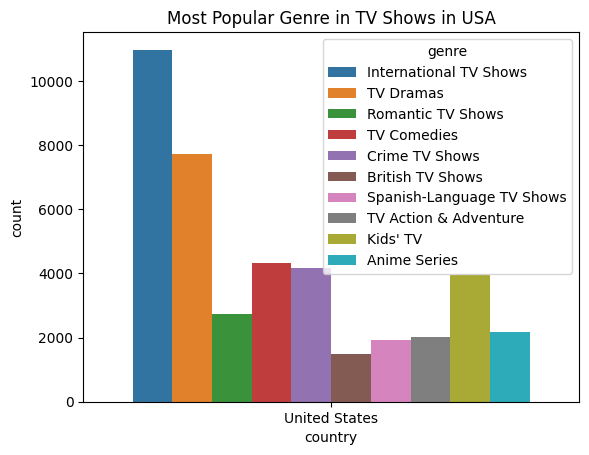

In [ ]:
us_data = top10_data[top10_data['country'] == 'United States']
sns.countplot(data= us_data, x='country', hue='genre')
plt.title("Most Popular Genre in TV Shows in USA")
plt.show()

We can see International and Dramas are most popular genres across all Nations. Along with that Anime genre is very well popular in country of Japan, and Romatic Dramas in South Korea and Thailand.

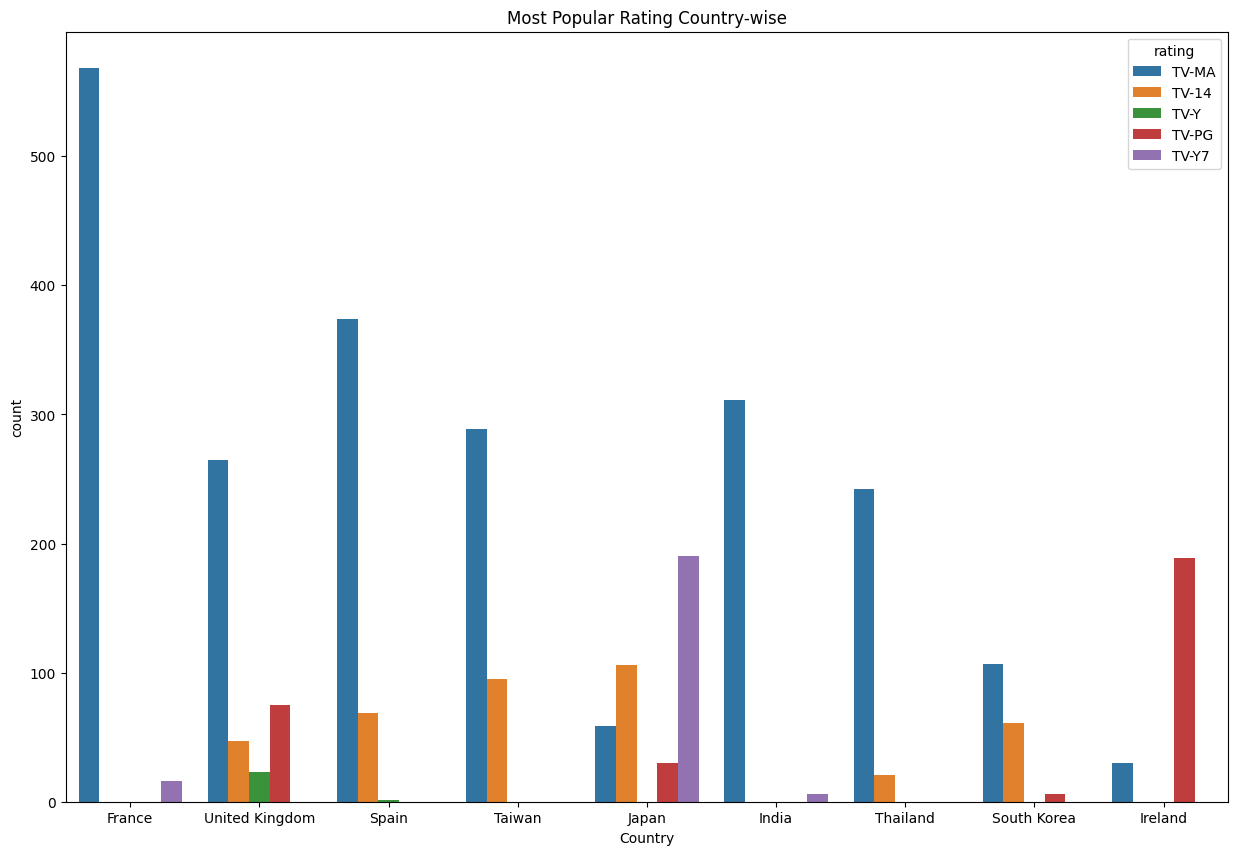

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data= top10_data1, x='country', hue='rating')
plt.xlabel("Country")
plt.title("Most Popular Rating Country-wise")
plt.show()

As expected, Mature Content like TV-MA and TV-14 are most popular among audience across the top countries.

In [ ]:
top10_con = df_movies['country'].value_counts().index[:11]
top10_gen = df_movies['genre'].value_counts().index[:10]
top5_rat = df_movies['rating'].value_counts().index[:5]
top10_dur = df_movies['duration'].value_counts().index[:10]
top10_data = df_movies.loc[(df_movies['country'].isin(top10_con)) & (df_movies['genre'].isin(top10_gen)) & (df_movies['rating'].isin(top5_rat)) & (df_movies['duration'].isin(top10_dur))]
top10_data

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,month_added,week_added,year_added
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,80-100,9,38,2021
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,80-100,9,38,2021
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,80-100,9,38,2021
162,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,80-100,9,38,2021
163,My Little Pony: A New Generation,Robert Cullen,Liza Koshy,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,80-100,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202057,Zubaan,Mozez Singh,Malkeet Rauni,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,100-120,3,9,2019
202059,Zubaan,Mozez Singh,Anita Shabdish,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,100-120,3,9,2019
202060,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,100-120,3,9,2019
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,100-120,3,9,2019


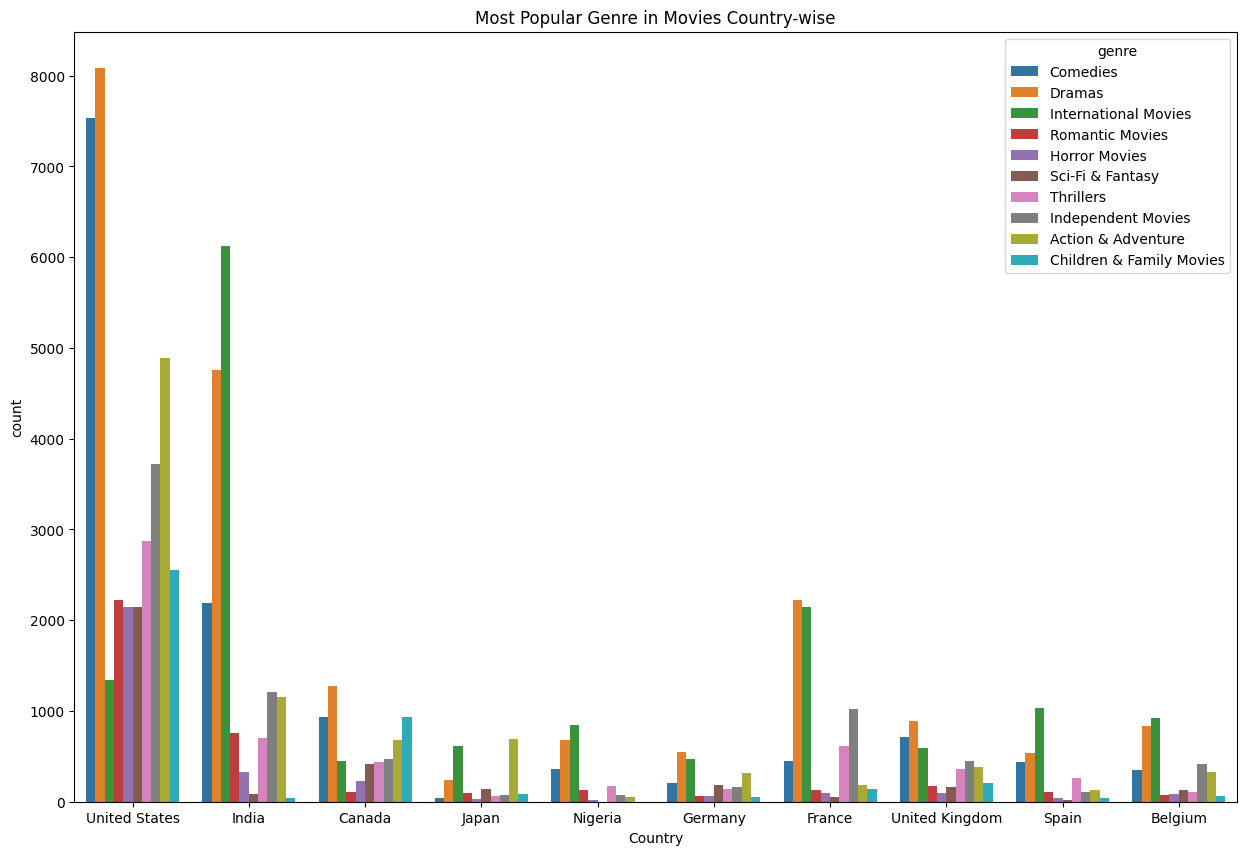

In [ ]:
top10_data = top10_data[(top10_data['country'] != 'Unknown Country') ] #& (top10_data['country'] != 'United States')
plt.figure(figsize=(15,10))
sns.countplot(data= top10_data, x='country', hue='genre')
plt.xlabel("Country")
plt.title("Most Popular Genre in Movies Country-wise")
plt.show()

Drama, Comedy and International Movies are most popular genres among all top countries

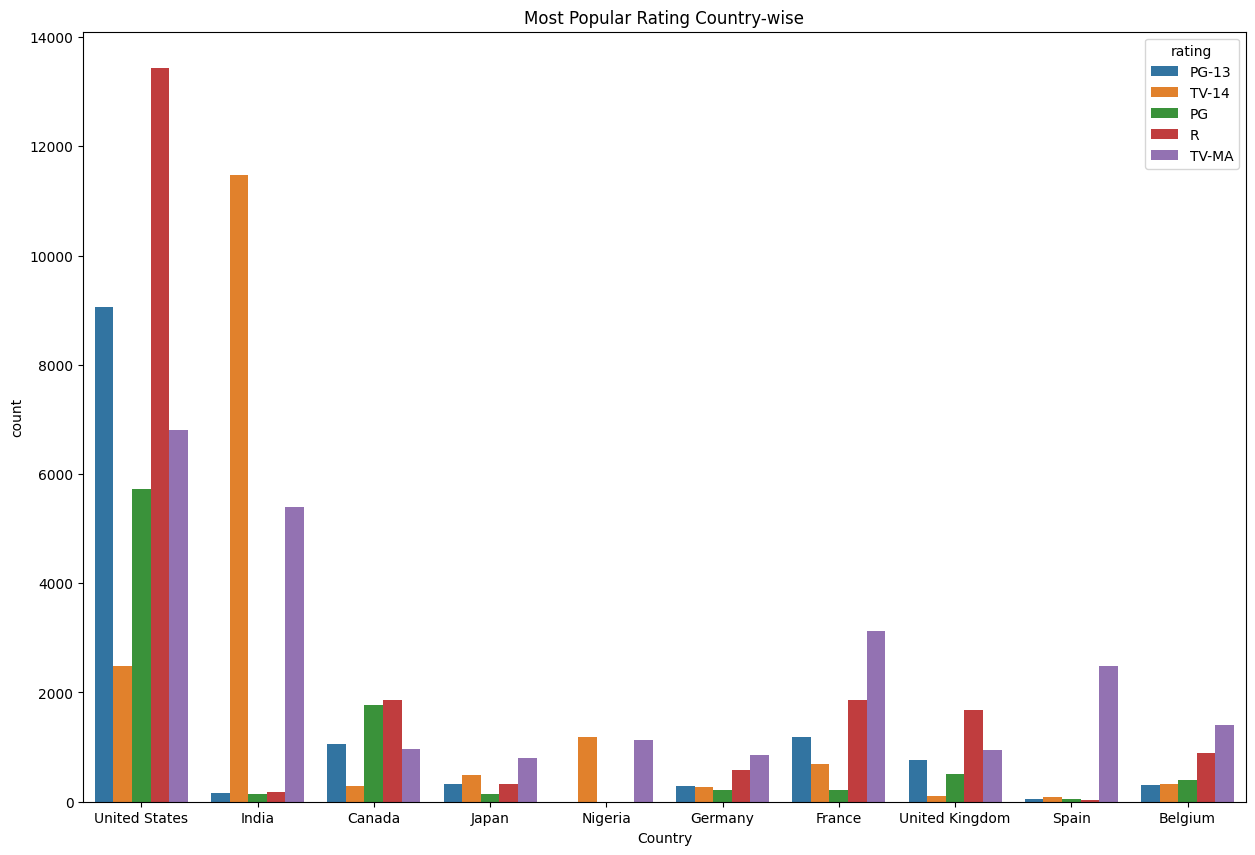

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data= top10_data, x='country', hue='rating')
plt.xlabel("Country")
plt.title("Most Popular Rating Country-wise")
plt.show()

As expected Mature content like R, TV-MA and TV-14 are most popular genre

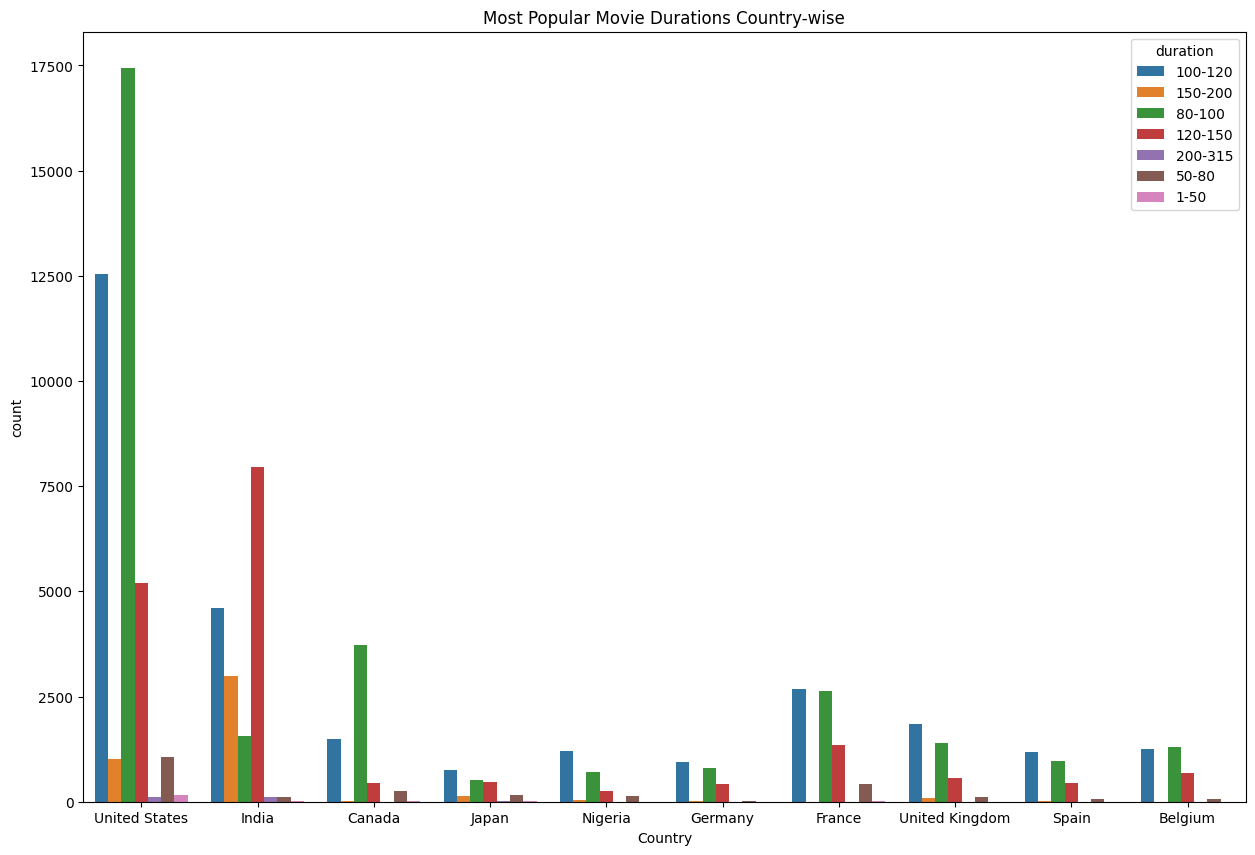

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data= top10_data, x='country', hue='duration')
plt.xlabel("Country")
plt.title("Most Popular Movie Durations Country-wise")
plt.show()

Most audience prefers movies of length 80 -100 and 100-120 mins throughout nations, whereas indian audience normally prefers movies of length 120-150 mins.

### Recommendations:

- The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.

- Add TV Shows in July/August and Movies in last week of the year/first month of the next year.

- For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popular along with the genres in first point, hence recommended.

- For UK audience, recommended length for movies is same as that of USA (80-120 mins)

- The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content .

- Add movies for Indian Audience, it has been declining since 2018.

- Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.